In [1]:
import sys
import os

import numpy as np 
import netCDF4 as nc 

#import matplotlib
#tkagg = matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
#plt.ion()

#sys.path.append('/home/beywood/ST/CIMR_RGB/CIMR-RGB/src/cimr_rgb')
#from grid_generator import GRIDS
#from numpy import array, full, nan, nanmean, polyfit, isnan, isinf
#import warnings
#with warnings.catch_warnings():
#    warnings.simplefilter("ignore")

from cimr_rgb.grid_generator import GRIDS

In [39]:

def load_netcdf_as_dict(file_path):
    """
    Load the contents of a NetCDF file into a Python dictionary.

    Args:
        file_path (str): Path to the NetCDF file.

    Returns:
        dict: A nested dictionary containing the NetCDF file's contents.
    """
    def recursive_load(nc_group):
        """
        Recursively load NetCDF group contents into a nested dictionary.
        """
        data_dict = {}
        for var_name, variable in nc_group.variables.items():
            data_dict[var_name] = variable[:]  # Load variable data as a NumPy array
        for group_name, group in nc_group.groups.items():
            data_dict[group_name] = recursive_load(group)  # Recursively load groups
        return data_dict

    # Open the NetCDF file
    with nc.Dataset(file_path, 'r') as nc_file:
        return recursive_load(nc_file)


def print_netcdf_contents(file_path):
    """
    Print a summary of the contents of a NetCDF file.
    
    Args:
        file_path (str): Path to the NetCDF file.
    """
    with nc.Dataset(file_path, 'r') as nc_file:
        print("NetCDF File Contents:")
        print(f"Dimensions: {list(nc_file.dimensions.keys())}")
        print(f"Variables: {list(nc_file.variables.keys())}")
        if nc_file.groups:
            print("Groups:")
            for group_name in nc_file.groups:
                print(f"  {group_name}")
        print("Global Attributes:")
        for attr_name in nc_file.ncattrs():
            print(f"  {attr_name}: {getattr(nc_file, attr_name)}")


# Example Usage
file_path = "/home/eva-v3/Desktop/ubuntu-22.04/cimr/output/SMAP_L1C_IDS_9km_2024-12-06_15-59-35.nc"  # Replace with your NetCDF file path
try:
    print("Loading and printing NetCDF contents...")
    print_netcdf_contents(file_path)
    
    print("\nLoading NetCDF as dictionary...")
    data_dict = load_netcdf_as_dict(file_path)
    print("Data loaded successfully into a dictionary.")
    
    # Print a summary of the dictionary
    for key, value in data_dict.items():
        if isinstance(value, dict):
            print(f"Group: {key} (Contains {len(value)} items)")
        elif isinstance(value, np.ndarray):
            print(f"Variable: {key} (Shape: {value.shape})")
        else:
            print(f"{key}: {value}")
except FileNotFoundError:
    print("NetCDF file not found. Please provide a valid file path.")

Loading and printing NetCDF contents...
NetCDF File Contents:
Dimensions: ['n_feeds_L_BAND', 'n_samples_L_BAND', 'n_scans', 'time', 'y', 'x']
Variables: []
Groups:
  G
Global Attributes:
  conventions: CF-1.6
  naming_authority: European Space Agency
  processing_level: L1C
  comment: Test data set output that represents an example L1C product for evaluation of SMAP instrument
  license: None
  date_created: 2024-12-06_15-59-35 CET
  creator_name: Maksym Brilenkov
  creator_email: brilenkov@stcorp.no
  creator_url: https://www.stcorp.no/
  creator_institution: Science and Technology AS
  project: CIMR Re-Gridding toolBox (RGB)
  date_metadata_modified: 2024-12-06_15-59-35 CET
  product_version: 1.0.0
  platform: SMAP
  instrument: SMAP
  keywords: satellites, passive microwave radiometry
  input_level1b_filename: SMAP_L1B_TB_47185_D_20231201T212120_R18290_001.h5
  level_01_atbd: Level 0, 1 Algorithms Theoretical Baseline Document Description and Performance analysis, Thales Alenia Spac

/tmp/ipykernel_103216/1247888820.py:17: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  data_dict[var_name] = variable[:]  # Load variable data as a NumPy array


(3248,)
(3248,)


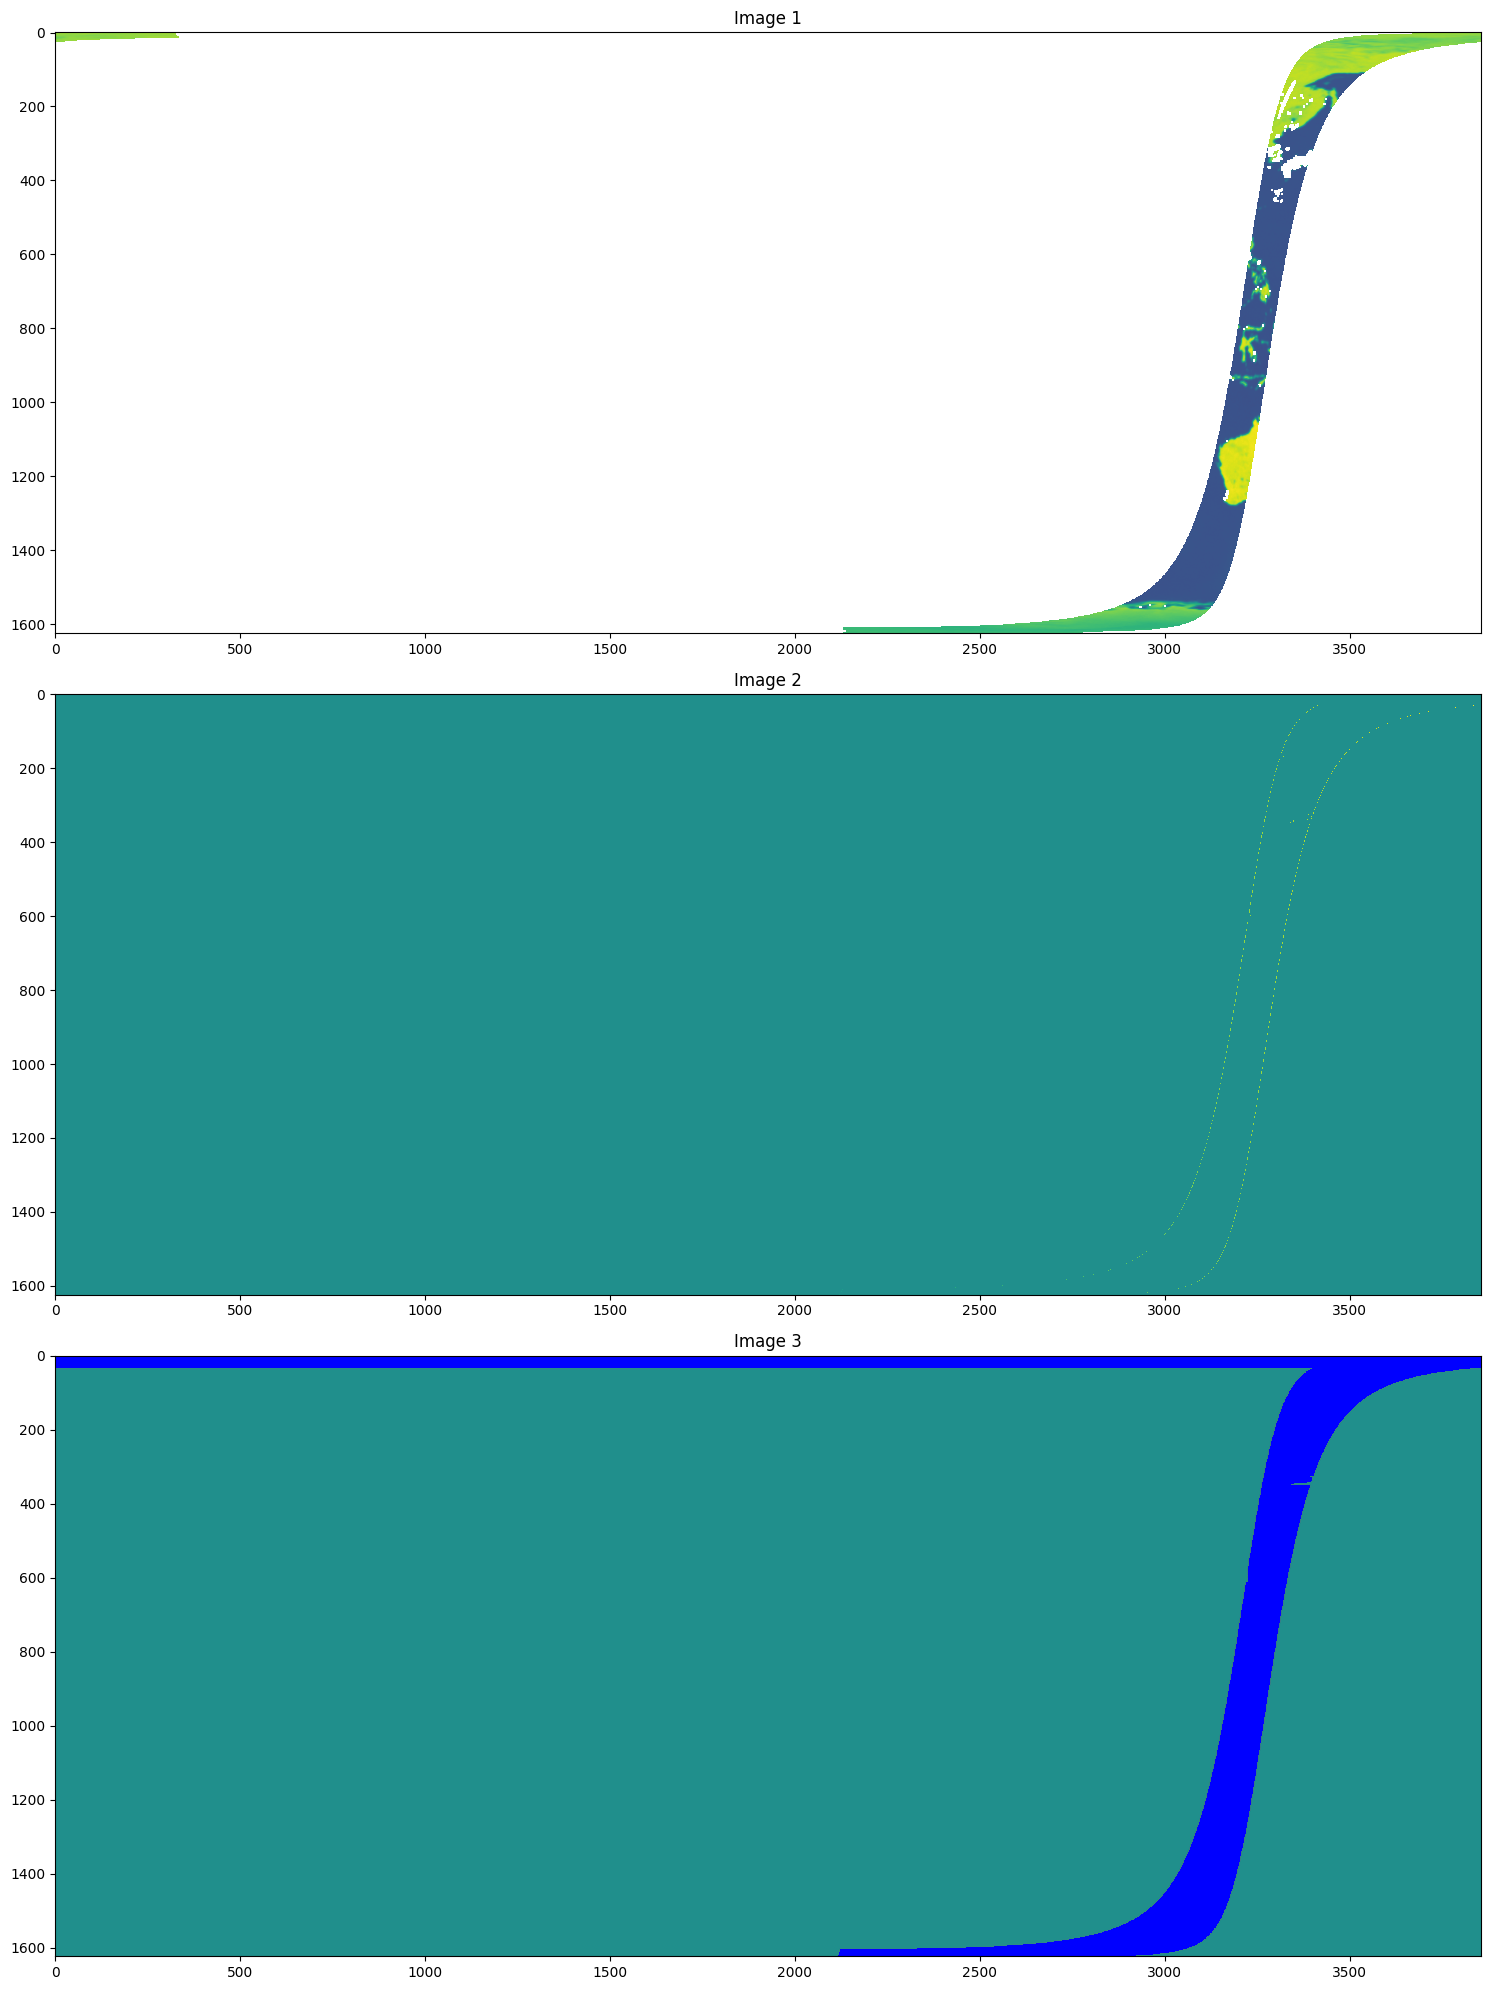

In [56]:
# Add the bounding box
def add_bounding_box(array, mask_value=np.nan):
    """
    Add a bounding box around a 2D array with the edges set to 1
    and the rest set to a masked value or kept unchanged.

    Args:
        array (numpy.ndarray): Input 2D array.
        mask_value (float): Value to mask the interior of the array.

    Returns:
        numpy.ndarray: Array with the bounding box added.
    """
    # Create a copy of the array filled with mask_value
    #array_with_bbox = np.full_like(array, fill_value = 0)#mask_value)

    #valid_indices = np.argwhere(~np.isnan(array))

    #print(f"grid is of shape {array.shape}")
    
    #valid_array = np.where(~np.isnan(array))

    # Mask the NaN values
    masked_data = np.ma.masked_where(np.isnan(array), array)

    # Identify valid (non-masked) indices
    #valid_indices = np.argwhere(~masked_data.mask)
    
    # Calculate bounding box
    #row_min, row_max = valid_indices[:, 0].min(), valid_indices[:, 0].max()
    #col_min, col_max = valid_indices[:, 1].min(), valid_indices[:, 1].max()
    
    # Create a bounding box mask
    #bounding_box = np.zeros_like(masked_data.data, dtype=int)  # Initialize with 0s
    #bounding_box[row_min, col_min:col_max+1] = 1  # Top edge
    #bounding_box[row_max, col_min:col_max+1] = 1  # Bottom edge
    #bounding_box[row_min:row_max+1, col_min] = 1  # Left edge
    #bounding_box[row_min:row_max+1, col_max] = 1  # Right edge

    # Create an output masked array filled with NaNs (or a masked array)
    output = np.ma.masked_all_like(masked_data)
    
    # Loop through each row
    for i, row in enumerate(masked_data):
        # Find indices of non-masked elements
        non_masked_indices = np.where(~row.mask)[0]
        if non_masked_indices.size > 0:  # Check if there are non-masked values
            first_idx = non_masked_indices[0]
            last_idx = non_masked_indices[-1]
            # Store the first and last non-masked elements in the output array
            output[i, first_idx] = masked_data[i, first_idx]
            output[i, last_idx] = masked_data[i, last_idx]
    
    # Print the output
    #print("Original Masked Array:")
    #print(masked_data)
    #print("\nOutput Masked Array with First and Last Non-Masked Elements:")
    #print(output)

    #print(np.shape(valid_array))

    #row_min, row_max = valid_indices[:, 0].min(), valid_indices[:, 0].max()
    #col_min, col_max = valid_indices[:, 1].min(), valid_indices[:, 1].max()
    
    # Create a bounding box mask
    #bounding_box = np.zeros_like(valid_array, dtype=int)
    #bounding_box[row_min, col_min:col_max+1] = 1  # Top edge
    #bounding_box[row_max, col_min:col_max+1] = 1  # Bottom edge
    #bounding_box[row_min:row_max+1, col_min] = 1  # Left edge
    #bounding_box[row_min:row_max+1, col_max] = 1  # Right edge

    #print(array_with_bbox)

    # Set the edges of the array to 1
    #array_with_bbox[0:100, :] = 100               # Top edge
    #print(array_with_bbox)
    #array_with_bbox[-1, :] = 100             # Bottom edge
    #print(array_with_bbox)
    #array_with_bbox[:, 0:100] = 100              # Left edge
    #print(array_with_bbox)
    #array_with_bbox[:, -1] = 100             # Right edge
    #print(array_with_bbox)

    #unmasked_indices = np.where(~array.mask)

    return output #masked_array #bounding_box #array_with_bbox

grid_shape = GRIDS["EASE2_G9km"]['n_rows'], GRIDS["EASE2_G9km"]['n_cols']
# create nan array with shape of grid_shape
grid = np.full(grid_shape, np.nan)


#print(data_dict['G']['Navigation']['L_BAND'].keys())

variable = data_dict['G']['Measurement']['L_BAND']['bt_h_fore']
cell_row = data_dict['G']['Measurement']['L_BAND']['cell_row_fore']
cell_col = data_dict['G']['Measurement']['L_BAND']['cell_col_fore']

longitude = data_dict['G']['Navigation']['L_BAND']['longitude_fore']
latitude  = data_dict['G']['Navigation']['L_BAND']['latitude_fore']

cell_row = cell_row.astype(int)
cell_col = cell_col.astype(int)

#print(f"Length of variable: {len(variable)}")
#print(f"Length of cell_row: {len(cell_row)}")
#print(f"Length of cell_col: {len(cell_col)}")

#print(f"cell_row mask: {cell_row.mask}")
#print(f"cell_col mask: {cell_col.mask}")

lon_grid = np.full(grid_shape, np.nan)
lat_grid = np.full(grid_shape, np.nan)

for i in range(len(cell_row)):
    #if i in range(0,10):
        #print(cell_row[i], cell_col[i])
        #print(variable(i))
    #if not cell_row.mask[i] and not cell_col.mask[i]:
    grid[int(cell_row[i]), int(cell_col[i])] = variable[i]

    lon_grid[int(cell_row[i]), int(cell_col[i])] = longitude[i]
    lat_grid[int(cell_row[i]), int(cell_col[i])] = latitude[i]
    
#print(grid.shape)
#print(grid)

#plt.imshow(grid)

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 20))  # 2 rows, 2 columns

# Display each image in a subplot
axes[0].imshow(grid, cmap='viridis')
axes[0].set_title("Image 1")

masked_array = add_bounding_box(grid)

lon_masked = add_bounding_box(lon_grid)
lat_masked = add_bounding_box(lat_grid)

valid_lons = lon_masked.compressed()  # Extract non-masked longitudes
valid_lats = lat_masked.compressed()  # Extract non-masked latitudes

print(valid_lons.shape)
print(valid_lats.shape) 


#print(f"Masked lon: {lon_masked}")

rows, cols = masked_array.shape
lon_rows, lon_cols = lon_masked.shape
lat_rows, lat_cols = lat_masked.shape

lines = []
lon_lines = []
lat_lines = []

for i in range(rows):
    # Get non-masked indices
    valid_indices = np.where(~masked_array.mask[i])[0]

    if valid_indices.size > 1:  # Ensure at least two valid points to connect
        first_col, last_col = valid_indices[0], valid_indices[-1]
        lines.append(((i, first_col), (i, last_col)))  # Store line endpoints

        
    lon_valid_indices = np.where(~lon_masked.mask[i])[0]    
    if lon_valid_indices.size > 1:  # Ensure at least two valid points to connect
        first_col, last_col = lon_valid_indices[0], lon_valid_indices[-1]
        lon_lines.append(((i, first_col), (i, last_col)))  # Store line endpoints

    lat_valid_indices = np.where(~lat_masked.mask[i])[0]    
    if lat_valid_indices.size > 1:  # Ensure at least two valid points to connect
        first_col, last_col = lat_valid_indices[0], lat_valid_indices[-1]
        lat_lines.append(((i, first_col), (i, last_col)))  # Store line endpoints

#axes[1].imshow(masked_array.data, cmap='viridis', interpolation='none')
#axes[1].set_title("Image 2")

axes[1].imshow(lon_masked.data, cmap='viridis', interpolation='none')
axes[1].set_title("Image 2")

for line in lon_lines:
    (y1, x1), (y2, x2) = line
    plt.plot([x1, x2], [y1, y2], color='yellow', linewidth=1.5)  # Line from first to last element in a row

axes[2].imshow(lat_masked.data, cmap='viridis', interpolation='none')
axes[2].set_title("Image 3")

for line in lat_lines:
    (y1, x1), (y2, x2) = line
    plt.plot([x1, x2], [y1, y2], color='blue', linewidth=1.5)  # Line from first to last element in a row

# Draw the contour lines
#for line in lines:
#    (y1, x1), (y2, x2) = line
#    plt.plot([x1, x2], [y1, y2], color='red', linewidth=1.5)  # Line from first to last element in a row



#for i in range(rows):
#    # Find non-masked indices in each row
#    valid_indices = np.where(~masked_array.mask[i])[0]
#    if valid_indices.size > 1:  # At least two points in the row
#        first_col, last_col = valid_indices[0], valid_indices[-1]
#        contour_mask[i, first_col] = 1  # Mark the first element
#        contour_mask[i, last_col] = 1  # Mark the last element

# Use `contour` to draw outlines around non-zero values in `contour_mask`
#plt.contour(contour_mask, levels=[0.5], colors='red', linewidths=1.5)

#plt.show()



# Adjust layout and show
plt.tight_layout()
plt.show()

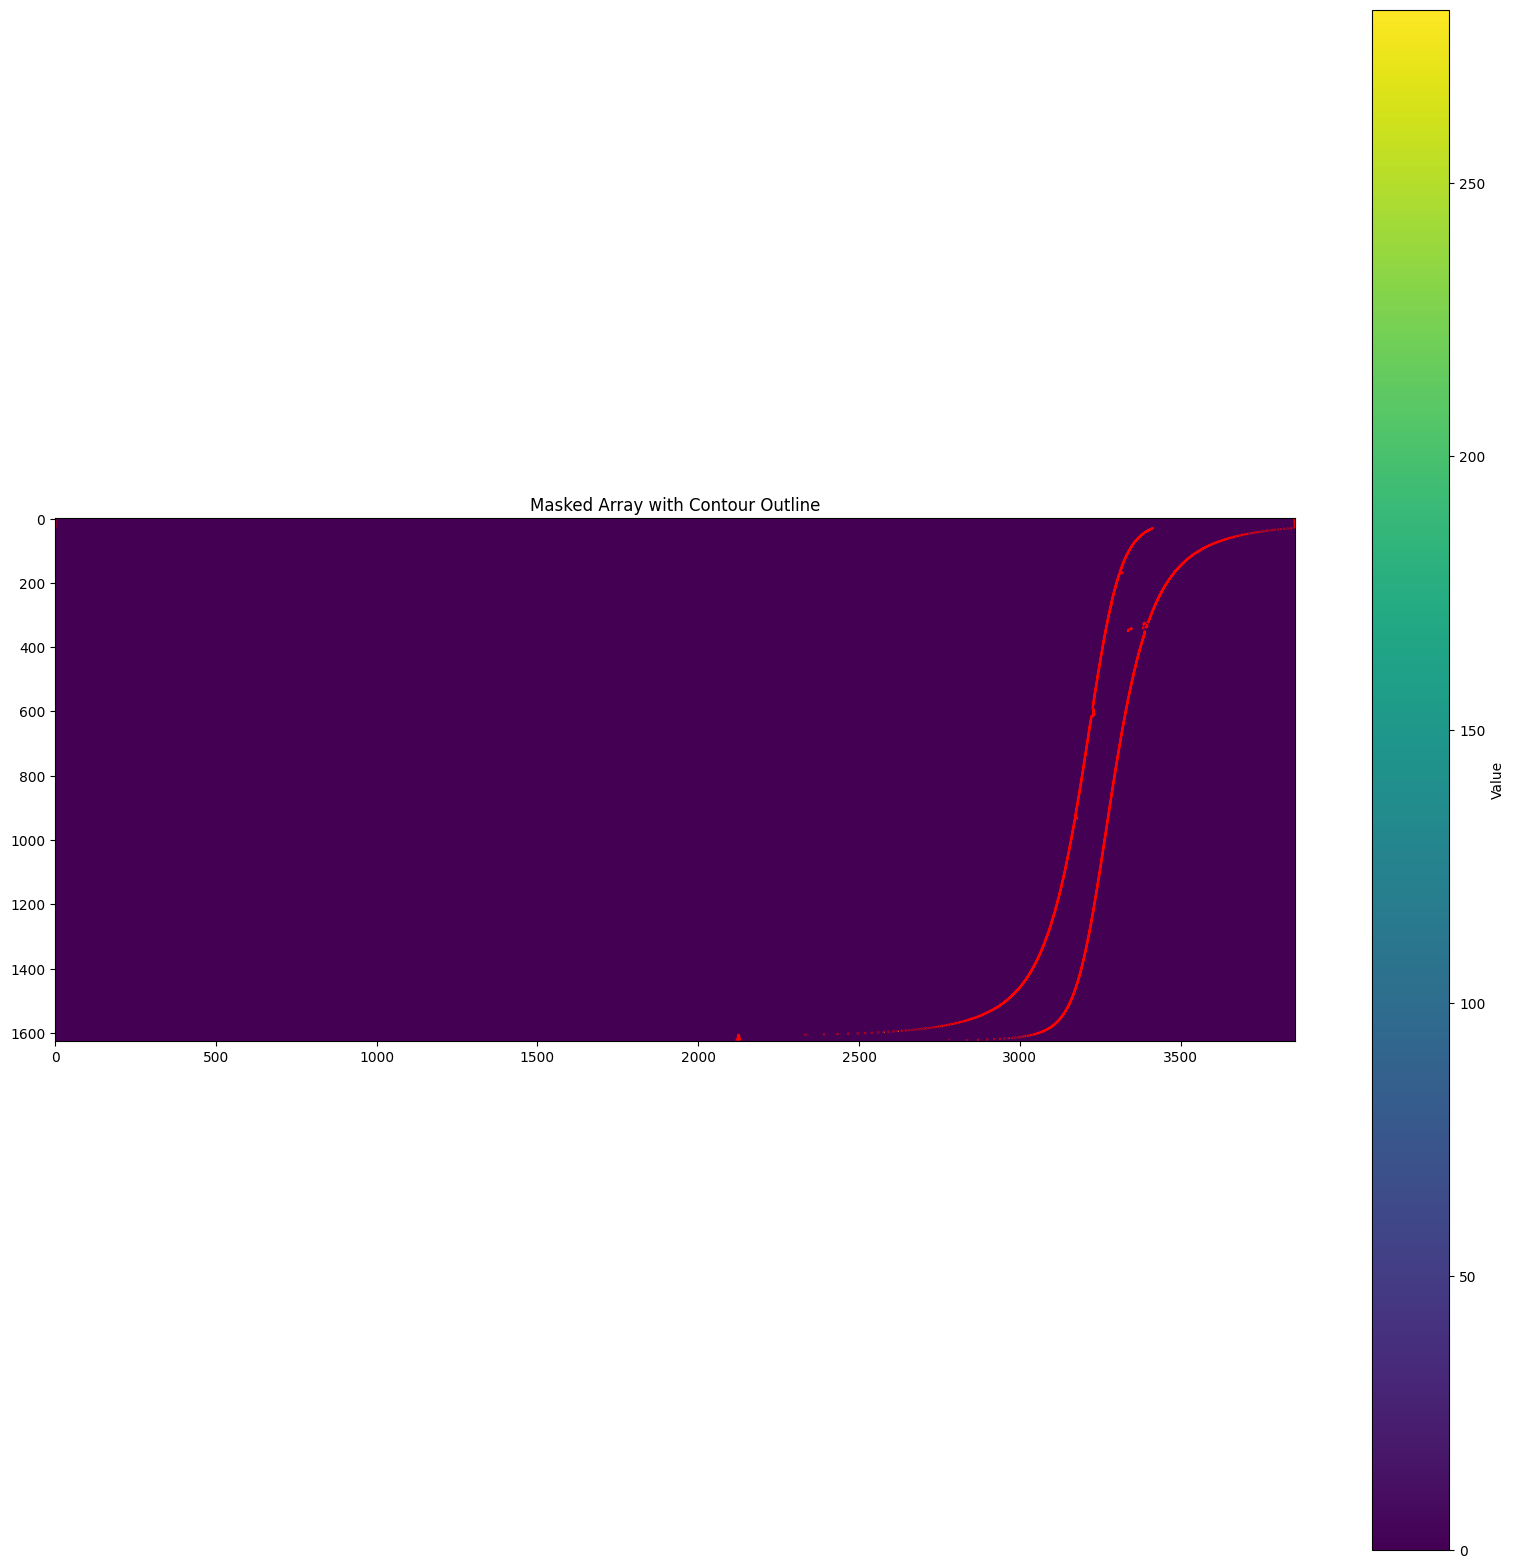

In [31]:

# Extract first and last non-masked indices for contouring
rows, cols = masked_array.shape
contour_mask = np.zeros_like(masked_array.data, dtype=int)

for i in range(rows):
    # Find non-masked indices in each row
    valid_indices = np.where(~masked_array.mask[i])[0]
    if valid_indices.size > 1:  # At least two points in the row
        first_col, last_col = valid_indices[0], valid_indices[-1]
        contour_mask[i, first_col] = 1  # Mark the first element
        contour_mask[i, last_col] = 1  # Mark the last element

# Plot the original data
plt.figure(figsize=(20, 20))
plt.imshow(masked_array.data, cmap='viridis', interpolation='none')
#plt.colorbar(label="Value")
plt.title("Masked Array with Contour Outline")

# Use `contour` to draw outlines around non-zero values in `contour_mask`
plt.contour(contour_mask, levels=[0.5], colors='red', linewidths=1.5)

plt.show()

In [40]:
import numpy as np

# Assuming grid, cell_row, cell_col, and variable are already defined
# Extract unmasked indices
#print(variable.mask.shape)
unmasked_indices = np.where(~variable.mask)

# Get corresponding cell_row and cell_col for unmasked values
valid_cell_rows = cell_row[unmasked_indices]
valid_cell_cols = cell_col[unmasked_indices]

# Calculate the bounding box
row_min, row_max = valid_cell_rows.min(), valid_cell_rows.max()
col_min, col_max = valid_cell_cols.min(), valid_cell_cols.max()

# Print the bounding box
print(f"Bounding Box: Row Range = {row_min} to {row_max}, Column Range = {col_min} to {col_max}")

# Visualize the grid with the bounding box
grid[row_min:row_max+1, col_min:col_max+1] = 1  # Example: Set bounding box region to 1

import matplotlib.pyplot as plt

# Create a bounding box on a copy of the grid for visualization
grid_with_bbox = grid.copy()
grid_with_bbox[row_min, col_min:col_max+1] = 2  # Top edge
grid_with_bbox[row_max, col_min:col_max+1] = 2  # Bottom edge
grid_with_bbox[row_min:row_max+1, col_min] = 2  # Left edge
grid_with_bbox[row_min:row_max+1, col_max] = 2  # Right edge

# Visualize
plt.imshow(grid_with_bbox, cmap="viridis")
plt.colorbar()
plt.title("Grid with Bounding Box")
plt.show()


()


ValueError: Calling nonzero on 0d arrays is not allowed. Use np.atleast_1d(scalar).nonzero() instead. If the context of this error is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.

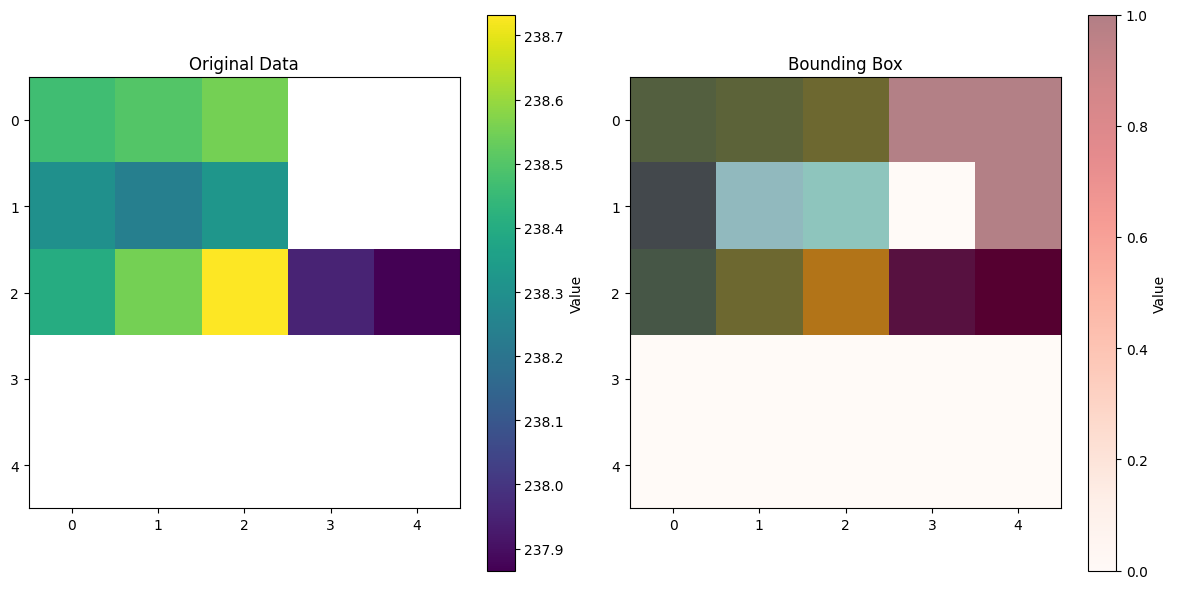

In [8]:
# Re-importing necessary libraries due to the reset
import numpy as np
import matplotlib.pyplot as plt

# Example array (replace with your actual array)
data = np.array([
    [238.46798706, 238.50099182, 238.55012512, np.nan, np.nan],
    [238.29966736, 238.23847961, 238.3221283, np.nan, np.nan],
    [238.40190125, 238.55090332, 238.73272705, 237.95184326, 237.86582947],
    [np.nan, np.nan, np.nan, np.nan, np.nan],
    [np.nan, np.nan, np.nan, np.nan, np.nan]
])

# Ignore NaN values by finding the bounds of valid (non-NaN) data
valid_indices = np.argwhere(~np.isnan(data))
row_min, row_max = valid_indices[:, 0].min(), valid_indices[:, 0].max()
col_min, col_max = valid_indices[:, 1].min(), valid_indices[:, 1].max()

# Create a bounding box mask
bounding_box = np.zeros_like(data, dtype=int)
bounding_box[row_min, col_min:col_max+1] = 1  # Top edge
bounding_box[row_max, col_min:col_max+1] = 1  # Bottom edge
bounding_box[row_min:row_max+1, col_min] = 1  # Left edge
bounding_box[row_min:row_max+1, col_max] = 1  # Right edge

# Visualize the original data and the bounding box
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.imshow(data, cmap="viridis", interpolation="none")
plt.title("Original Data")
plt.colorbar(label="Value")

# Bounding box visualization
plt.subplot(1, 2, 2)
plt.imshow(data, cmap="viridis", interpolation="none")
plt.imshow(bounding_box, cmap="Reds", alpha=0.5)  # Overlay bounding box
plt.title("Bounding Box")
plt.colorbar(label="Value")

plt.tight_layout()
plt.show()


In [22]:
import numpy as np
import numpy.ma as ma

# Example masked array
data = np.array([
    [1, 2, np.nan, np.nan,1],
    [4, np.nan, 6, np.nan, np.nan],
    [np.nan, 8, 9, np.nan, 30],
    [np.nan, np.nan, np.nan, np.nan, 45]
])
masked_data = ma.masked_where(np.isnan(data), data)

print(masked_data)

# Create an output masked array filled with NaNs (or a masked array)
output = ma.masked_all_like(masked_data)

# Loop through each row
for i, row in enumerate(masked_data):
    # Find indices of non-masked elements
    non_masked_indices = np.where(~row.mask)[0]
    if non_masked_indices.size > 0:  # Check if there are non-masked values
        first_idx = non_masked_indices[0]
        last_idx = non_masked_indices[-1]
        # Store the first and last non-masked elements in the output array
        output[i, first_idx] = masked_data[i, first_idx]
        output[i, last_idx] = masked_data[i, last_idx]

# Print the output
print("Original Masked Array:")
print(masked_data)
print("\nOutput Masked Array with First and Last Non-Masked Elements:")
print(output)


[[1.0 2.0 -- -- 1.0]
 [4.0 -- 6.0 -- --]
 [-- 8.0 9.0 -- 30.0]
 [-- -- -- -- 45.0]]
Original Masked Array:
[[1.0 2.0 -- -- 1.0]
 [4.0 -- 6.0 -- --]
 [-- 8.0 9.0 -- 30.0]
 [-- -- -- -- 45.0]]

Output Masked Array with First and Last Non-Masked Elements:
[[1.0 -- -- -- 1.0]
 [4.0 -- 6.0 -- --]
 [-- 8.0 -- -- 30.0]
 [-- -- -- -- 45.0]]


In [7]:
# Testing script for T.12
# Remapping of L1b SMAP data with IDS (inverse distance squared) algorithm on an EASE2 global grid
# The remmapped data are compatible with SMAP L1c data obtained by NASA, with an average relative difference of brightness temperature < 0.25%

# Add RGB remapped netCDF here
rgb_data = '/home/beywood/ST/CIMR_RGB/CIMR-RGB/output/cimr_rgb/SMAP_L1C_IDS_36km_20241202160348.nc'
# Add the NASA version you are comparing to here
nasa_data = '/home/beywood/ST/CIMR_RGB/CIMR-RGB/dpr/L1C/SMAP/NASA/SMAP_L1C_TB_47185_D_20231201T212059_R19240_002.h5'

GRID = 'EASE2_G36km'
PROJECTION = 'G'

class SMAP_comparison:

    def __init__(self, rgb_data_path, nasa_data_path):
        self.rgb_data = self.get_netcdf_data(rgb_data_path)
        self.nasa_data = self.get_hdf5_data(nasa_data_path)

    @staticmethod
    def get_netcdf_data(path):
        import netCDF4 as nc
        gridded_vars = {}
        with nc.Dataset(path, 'r') as f:
            data = f[f"{PROJECTION}"]
            measurement = data['Measurement']
            l_band = measurement['L_BAND']

            for bt in ['bt_h_fore', 'bt_h_aft', 'bt_v_fore', 'bt_v_aft']:
                if 'fore' in bt:
                    row = array(l_band['cell_row_fore'][:])
                    col = array(l_band['cell_col_fore'][:])
                elif 'aft' in bt:
                    row = array(l_band['cell_row_aft'][:])
                    col = array(l_band['cell_col_aft'][:])
                else:
                    row = ''
                    col = ''
                var = array(l_band[bt][:])
                grid = full((GRIDS[GRID]['n_rows'], GRIDS[GRID]['n_cols']), nan)

                for count, sample in enumerate(var):
                    if sample == 9.969209968386869e36:
                        continue
                    grid[row[count], col[count]] = sample
                gridded_vars[bt] = grid
            return gridded_vars

    @staticmethod
    def get_hdf5_data(path):
        import h5py
        gridded_vars = {}
        with h5py.File(path, 'r') as f:
            data = f['Global_Projection']
            row = data['cell_row'][:]
            col = data['cell_column'][:]

            bts  = {'bt_h_fore': data['cell_tb_h_fore'][:],
                    'bt_h_aft': data['cell_tb_h_aft'][:],
                    'bt_v_fore': data['cell_tb_v_fore'][:],
                    'bt_v_aft': data['cell_tb_v_aft'][:]}

            for bt in bts:
                var = array(bts[bt])
                grid = full((GRIDS[GRID]['n_rows'], GRIDS[GRID]['n_cols']), nan)

                for count, sample in enumerate(var):
                    grid[row[count], col[count]] = sample
                gridded_vars[bt] = grid
            return gridded_vars

    def map_compare(self):

        cmap = 'viridis'
        # bt_h plt
        fig, axs = plt.subplots(2, 3, constrained_layout=True)
        im00 = axs[0,0].imshow(self.rgb_data['bt_h_fore'][:,550:], cmap=cmap)
        axs[0,0].set_title('RGB Remap (bt_h_fore)')
        om01 = axs[0,1].imshow(self.nasa_data['bt_h_fore'][:,550:], cmap=cmap)
        axs[0,1].set_title('NASA Remap (bt_h_fore)')
        bt_h_fore_diff = abs(self.rgb_data['bt_h_fore'] - self.nasa_data['bt_h_fore'])
        im02 = axs[0,2].imshow(bt_h_fore_diff[:,550:], cmap=cmap)
        axs[0,2].set_title('Difference (bt_h_fore)')
        # aft
        im10 = axs[1,0].imshow(self.rgb_data['bt_h_aft'][:,550:], cmap=cmap)
        axs[1,0].set_title('RGB Remap (bt_h_aft)')
        im11 = axs[1,1].imshow(self.nasa_data['bt_h_aft'][:,550:], cmap=cmap)
        axs[1,1].set_title('NASA Remap (bt_h_aft)')
        bt_h_aft_diff = abs(self.rgb_data['bt_h_aft'] - self.nasa_data['bt_h_aft'])
        im12 = axs[1,2].imshow(bt_h_aft_diff[:,550:], cmap=cmap)
        axs[1,2].set_title('Difference (bt_h_aft)')
        fig.colorbar(im02, ax=axs[0,2])
        fig.colorbar(im12, ax=axs[1, 2])

        # Add Statistics
        # Calculate the average relative difference
        fore_mean_diff = nanmean(bt_h_fore_diff)
        aft_mean_diff = nanmean(bt_h_aft_diff)
        print(f"Average relative difference for bt_h_fore: {fore_mean_diff}")
        print(f"Average relative difference for bt_h_aft: {aft_mean_diff}")

        # Calculate percentage Differences
        fore_percent_diff = (fore_mean_diff / nanmean(self.nasa_data['bt_h_fore'])) * 100
        aft_percent_diff = (aft_mean_diff / nanmean(self.nasa_data['bt_h_aft'])) * 100
        print(f"Average percentage difference for bt_h_fore: {fore_percent_diff}")
        print(f"Average percentage difference for bt_h_aft: {aft_percent_diff}")

        # Add statistics to the plot
        # axs[0,2].text(50,50, f"mean(abs(bt_diff)) = {fore_mean_diff}K")
        # axs[0,2].text(50, 50, f"mean(abs(bt_diff)) = {aft_mean_diff}K")
        axs[0,2].text(50, 50,
                fr"$\mu = \frac{{1}}{{n}} \sum_{{i=1}}^{{n}} | \mathrm{{RGB}}_i - \mathrm{{NASA}}_i |$",
                fontsize=14, color="black")

        axs[0,2].text(50, 100,
                fr"$\mu_{{fore}} =  {fore_mean_diff:.2f} K, \ \text{{or}} \ {fore_percent_diff:.2f}\%$",
                fontsize=14, color="black")

        axs[1, 2].text(50, 50,
                       fr"$\mu_{{aft}} =  {aft_mean_diff:.2f} K, \ \text{{or}} \ {aft_percent_diff:.2f}\%$",
                       fontsize=14, color="black")
        plt.show()

        # bt_v plt
        fig, axs = plt.subplots(2, 3, constrained_layout=True)
        im00 = axs[0, 0].imshow(self.rgb_data['bt_v_fore'][:, 550:], cmap=cmap)
        axs[0, 0].set_title('RGB Remap (bt_v_fore)')
        om01 = axs[0, 1].imshow(self.nasa_data['bt_v_fore'][:, 550:], cmap=cmap)
        axs[0, 1].set_title('NASA Remap (bt_v_fore)')
        bt_v_fore_diff = abs(self.rgb_data['bt_v_fore'] - self.nasa_data['bt_v_fore'])
        im02 = axs[0, 2].imshow(bt_v_fore_diff[:, 550:], cmap=cmap)
        axs[0, 2].set_title('Difference (bt_v_fore)')
        # aft
        im10 = axs[1, 0].imshow(self.rgb_data['bt_v_aft'][:, 550:], cmap=cmap)
        axs[1, 0].set_title('RGB Remap (bt_v_aft)')
        im11 = axs[1, 1].imshow(self.nasa_data['bt_v_aft'][:, 550:], cmap=cmap)
        axs[1, 1].set_title('NASA Remap (bt_v_aft)')
        bt_v_aft_diff = abs(self.rgb_data['bt_v_aft'] - self.nasa_data['bt_v_aft'])
        im12 = axs[1, 2].imshow(bt_v_aft_diff[:, 550:], cmap=cmap)
        axs[1, 2].set_title('Difference (bt_v_aft)')
        fig.colorbar(im02, ax=axs[0, 2])
        fig.colorbar(im12, ax=axs[1, 2])

        # Add Statistics
        # Calculate the average relative difference
        fore_mean_diff = nanmean(bt_v_fore_diff)
        aft_mean_diff = nanmean(bt_h_aft_diff)
        print(f"Average relative difference for bt_v_fore: {fore_mean_diff}")
        print(f"Average relative difference for bt_v_aft: {aft_mean_diff}")

        # Calculate percentage Differences
        fore_percent_diff = (fore_mean_diff / nanmean(self.nasa_data['bt_v_fore'])) * 100
        aft_percent_diff = (aft_mean_diff / nanmean(self.nasa_data['bt_v_aft'])) * 100
        print(f"Average percentage difference for bt_v_fore: {fore_percent_diff}")
        print(f"Average percentage difference for bt_v_aft: {aft_percent_diff}")

        # Add statistics to the plot
        # axs[0,2].text(50,50, f"mean(abs(bt_diff)) = {fore_mean_diff}K")
        # axs[0,2].text(50, 50, f"mean(abs(bt_diff)) = {aft_mean_diff}K")
        axs[0, 2].text(50, 50,
                       fr"$\mu = \frac{{1}}{{n}} \sum_{{i=1}}^{{n}} | \mathrm{{RGB}}_i - \mathrm{{NASA}}_i |$",
                       fontsize=14, color="black")

        axs[0, 2].text(50, 100,
                       fr"$\mu_{{fore}} =  {fore_mean_diff:.2f} K, \ \text{{or}} \ {fore_percent_diff:.2f}\%$",
                       fontsize=14, color="black")

        axs[1, 2].text(50, 50,
                       fr"$\mu_{{aft}} =  {aft_mean_diff:.2f} K, \ \text{{or}} \ {aft_percent_diff:.2f}\%$",
                       fontsize=14, color="black")
        plt.show()

    @staticmethod
    def scatter_stats(x, y):
        mask = ~isnan(x) & ~isnan(y) & ~isinf(x) & ~isinf(y)
        x = x[mask]
        y = y[mask]
        m, b = polyfit(x, y, 1)
        y_fit = m * x + b

        # Calculate R^2
        ss_res = sum((y - y_fit) ** 2)
        ss_tot = sum((y - y.mean()) ** 2)
        r_squared = 1 - (ss_res / ss_tot)

        return x, y, m, b, y_fit, r_squared


    def scatter_compare(self):
        x = self.rgb_data['bt_h_fore'].flatten()
        y = self.nasa_data['bt_h_fore'].flatten()
        x_h_fore, y_h_fore, m_h_fore, b_h_fore, y_fit_h_fore, r_squared = self.scatter_stats(x, y)

        x = self.rgb_data['bt_h_aft'].flatten()
        y = self.nasa_data['bt_h_aft'].flatten()
        x_h_aft, y_h_aft, m_h_aft, b_h_aft, y_fit_h_aft, r_squared = self.scatter_stats(x, y)

        x = self.rgb_data['bt_v_fore'].flatten()
        y = self.nasa_data['bt_v_fore'].flatten()
        x_v_fore, y_v_fore, m_v_fore, b_v_fore, y_fit_v_fore, r_squared = self.scatter_stats(x, y)

        x = self.rgb_data['bt_v_aft'].flatten()
        y = self.nasa_data['bt_v_aft'].flatten()

        x_v_aft, y_v_aft, m_v_aft, b_v_aft, y_fit_v_aft, r_squared = self.scatter_stats(x, y)

        fig, axs = plt.subplots(2,2)
        axs[0,0].scatter(x_h_fore, y_h_fore)
        axs[0,0].plot(x_h_fore, y_fit_h_fore, color='red')
        axs[0,0].legend(title=f"$R^2 = {r_squared:.3f}$")
        axs[0,0].set_title('bt_h_fore')
        axs[0,0].set_xlabel('RGB BT [K]')
        axs[0,0].set_ylabel('NASA BT [K]')

        axs[0,1].scatter(x_h_aft, y_h_aft)
        axs[0,1].plot(x_h_aft, y_fit_h_aft, color='red')
        axs[0,1].legend(title=f"$R^2 = {r_squared:.3f}$")
        axs[0,1].set_title('bt_h_aft')
        axs[0,1].set_xlabel('RGB BT [K]')
        axs[0,1].set_ylabel('NASA BT [K]')

        axs[1,0].scatter(x_v_fore, y_v_fore)
        axs[1,0].plot(x_v_fore, y_fit_v_fore, color='red')
        axs[1,0].legend(title=f"$R^2 = {r_squared:.3f}$")
        axs[1,0].set_title('bt_v_fore')
        axs[1,0].set_xlabel('RGB BT [K]')
        axs[1,0].set_ylabel('NASA BT [K]')

        axs[1,1].scatter(x_v_aft, y_v_aft)
        axs[1,1].plot(x_v_aft, y_fit_v_aft, color='red')
        axs[1,1].legend(title=f"$R^2 = {r_squared:.3f}$")
        axs[1,1].set_title('bt_v_aft')
        axs[1,1].set_xlabel('RGB BT [K]')
        axs[1,1].set_ylabel('NASA BT [K]')

        plt.show()

SMAP_comparison(rgb_data, nasa_data).map_compare()
SMAP_comparison(rgb_data, nasa_data).scatter_compare()

FileNotFoundError: [Errno 2] No such file or directory: '/home/beywood/ST/CIMR_RGB/CIMR-RGB/output/cimr_rgb/SMAP_L1C_IDS_36km_20241202160348.nc'